In [86]:
import cv2
print(cv2.__version__)
import matplotlib.pyplot as plt
import numpy as np

4.11.0


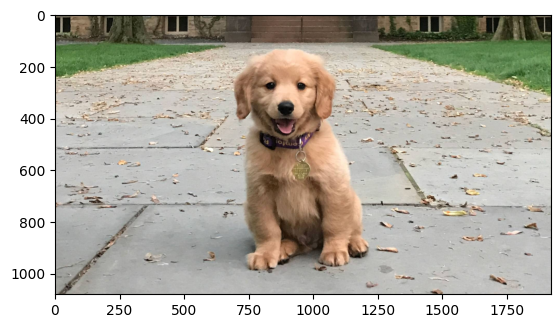

In [87]:
original=cv2.imread('../images/KOA_Nassau_2697x1517.jpg')
plt.imshow(cv2.cvtColor(original,cv2.COLOR_BGR2RGB))

# define all functions

In [88]:
def increase_brightness(img,value):
    brightened=np.clip(img+value,0,255).astype(np.uint8)#Limiting the range between 0 to 255
    return brightened

def contrast_stretching(dog, I_MIN=0, I_MAX=255):
    I_min_xy = np.min(dog)  # Minimum intensity in the input dog
    I_max_xy = np.max(dog)  # Maximum intensity in the input dog
    stretched = (dog - I_min_xy) * ((I_MAX - I_MIN) / (I_max_xy - I_min_xy)) + I_MIN
    return stretched.astype(np.uint8)

def apply_gaussian_filter(image, kernel_size=(5, 5), sigma=1):
    if image is None:
        raise ValueError("Error: Input image is None. Please check if the image is loaded correctly.")
    return cv2.GaussianBlur(image, kernel_size, sigma)

def apply_mean_filter(image, kernel_size=(5, 5)):
    filtered_image = cv2.blur(image, kernel_size)
    return filtered_image

def apply_moving_average_filter(image, kernel_size=(5, 5)):
    kernel = np.ones(kernel_size, np.float32) / (kernel_size[0] * kernel_size[1])
    filtered_image = cv2.filter2D(image, -1, kernel)
    return filtered_image

def apply_median_filter(image, kernel_size=5):
    filtered_image = cv2.medianBlur(image, kernel_size)
    return filtered_image

def apply_bilateral_filter(image, d=9, sigma_color=75, sigma_space=75):
    filtered_image = cv2.bilateralFilter(image, d, sigma_color, sigma_space)
    return filtered_image

def apply_cross_correlation_filter(image, kernel):
    filtered_image = cv2.filter2D(image, -1, kernel)
    return filtered_image

Text(0.5, 1.0, 'Brightened dog')

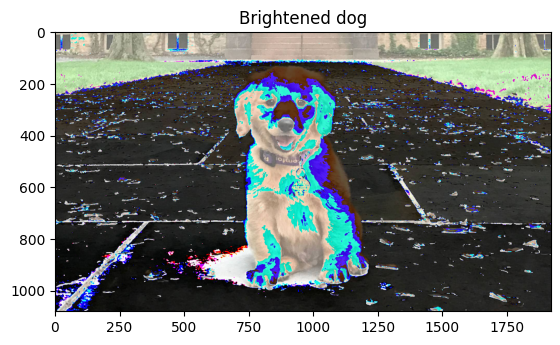

In [89]:
brightened=increase_brightness(original,100)
plt.imshow(cv2.cvtColor(brightened,cv2.COLOR_BGR2RGB))
plt.title("Brightened dog")

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

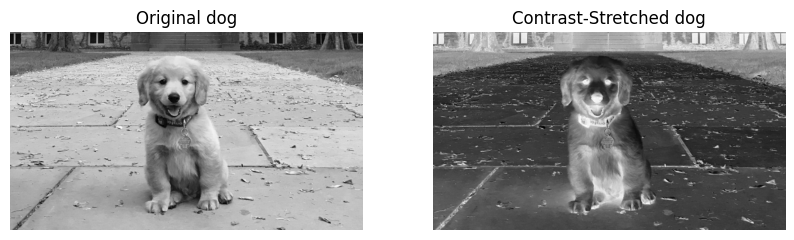

In [90]:
dog=cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
I_min_xy = np.min(dog)  
I_max_xy = np.max(dog)
contrast_dog=I_max_xy-dog+I_min_xy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(dog, cmap='gray')
plt.title("Original dog")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(contrast_dog, cmap='gray')
plt.title("Contrast-Stretched dog")
plt.axis("off")

(I(m0 n0) -MinxyI(xy) )*
 ((IMAX -IMIN) /(MaxxyI(xy) -MinxyI(xy)) +IMIN using these formula

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

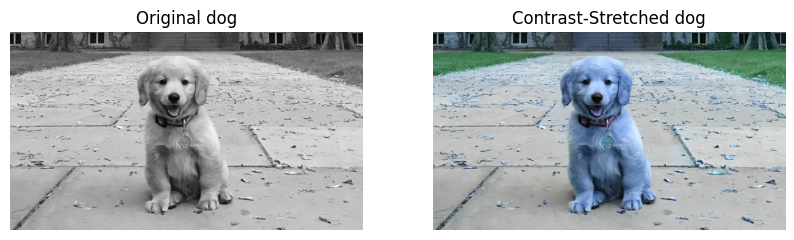

In [91]:
stretched_dog = contrast_stretching(original)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(dog, cmap='gray')
plt.title("Original dog")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(stretched_dog, cmap='gray')
plt.title("Contrast-Stretched dog")
plt.axis("off")

In [92]:
salt_pepper_image=cv2.imread('../images/Noise_salt_and_pepper.png')

[ WARN:0@1034.374] global loadsave.cpp:268 findDecoder imread_('../images/Noise_salt_and_pepper.png'): can't open/read file: check file path/integrity


Linear filters

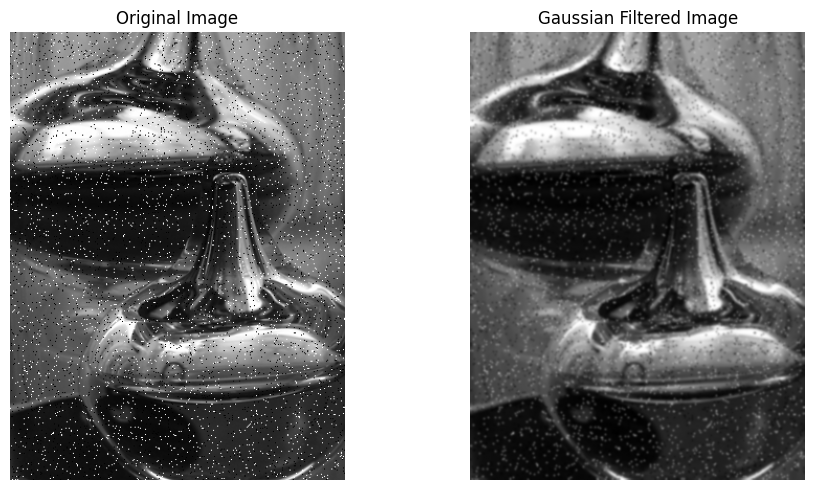

In [93]:
salt_pepper_image = cv2.imread("../images/Pasted image.png", cv2.IMREAD_GRAYSCALE)  # Ensure grayscale loading
if salt_pepper_image is None:
    raise ValueError("Error: Image not found or not loaded properly.")
gaussian_filtered = apply_gaussian_filter(salt_pepper_image, kernel_size=(5, 5), sigma=1)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(salt_pepper_image, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title("Gaussian Filtered Image")
plt.axis("off")
plt.tight_layout()
plt.show()

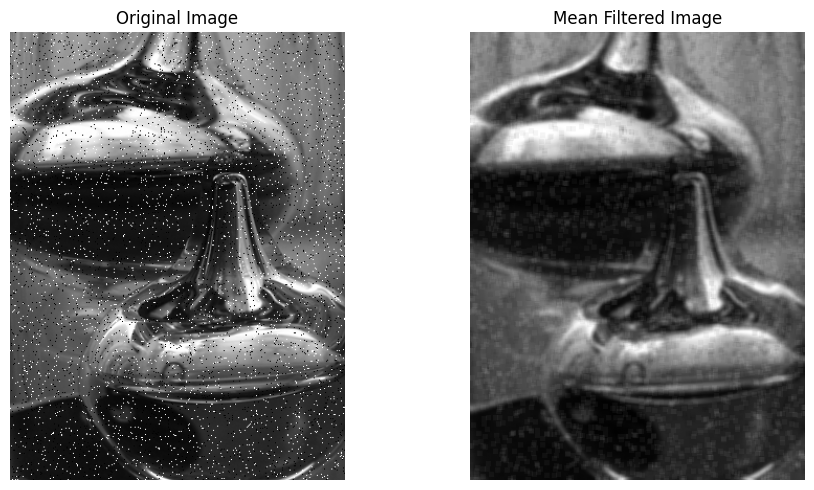

In [94]:
mean_filtered = apply_mean_filter(salt_pepper_image, kernel_size=(5, 5))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(salt_pepper_image, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(mean_filtered, cmap='gray')
plt.title("Mean Filtered Image")
plt.axis("off")
plt.tight_layout()
plt.show()

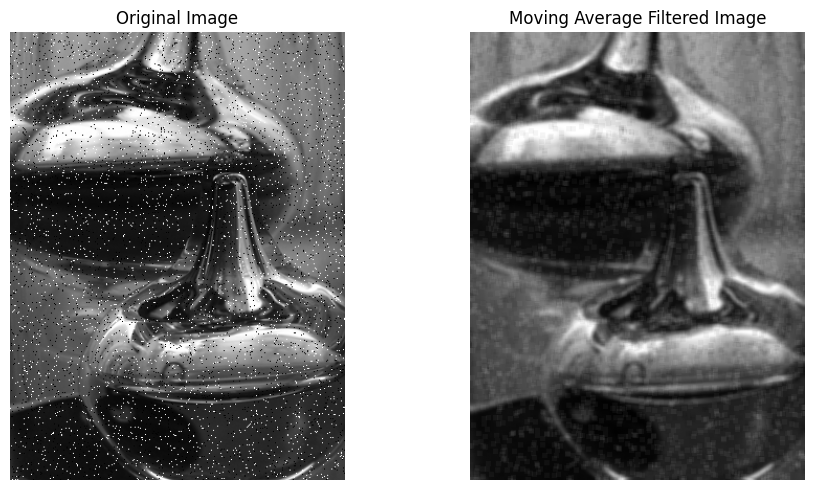

In [95]:
moving_avg_filtered = apply_moving_average_filter(salt_pepper_image, kernel_size=(5, 5))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(salt_pepper_image, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(moving_avg_filtered, cmap='gray')
plt.title("Moving Average Filtered Image")
plt.axis("off")
plt.tight_layout()
plt.show()

Non Linear filters

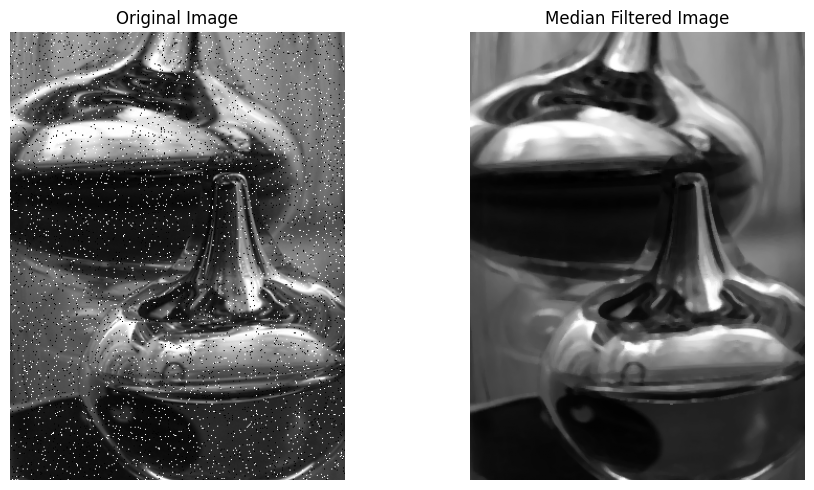

In [96]:
#Median Filter
median_filtered = apply_median_filter(salt_pepper_image, kernel_size=5)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(salt_pepper_image, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filtered Image")
plt.axis("off")
plt.tight_layout()
plt.show()

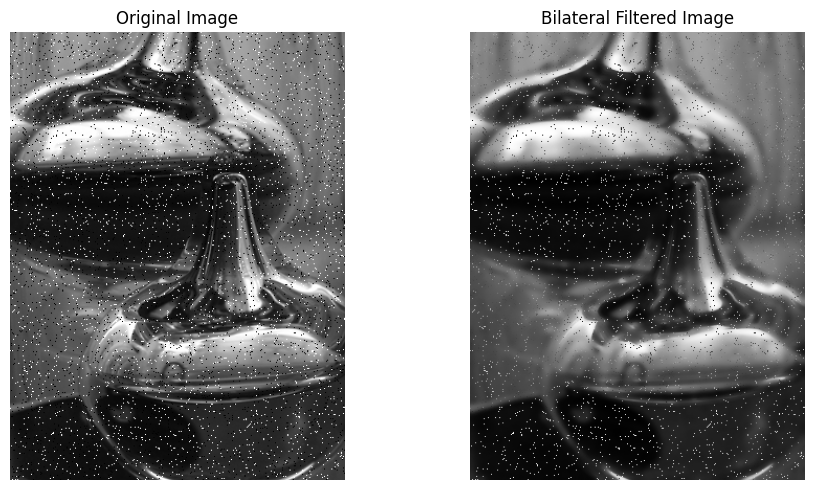

In [97]:
#Bilateral filter
bilateral_filtered = apply_bilateral_filter(salt_pepper_image)
# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(salt_pepper_image, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(bilateral_filtered, cmap='gray')
plt.title("Bilateral Filtered Image")
plt.axis("off")
plt.tight_layout()
plt.show()


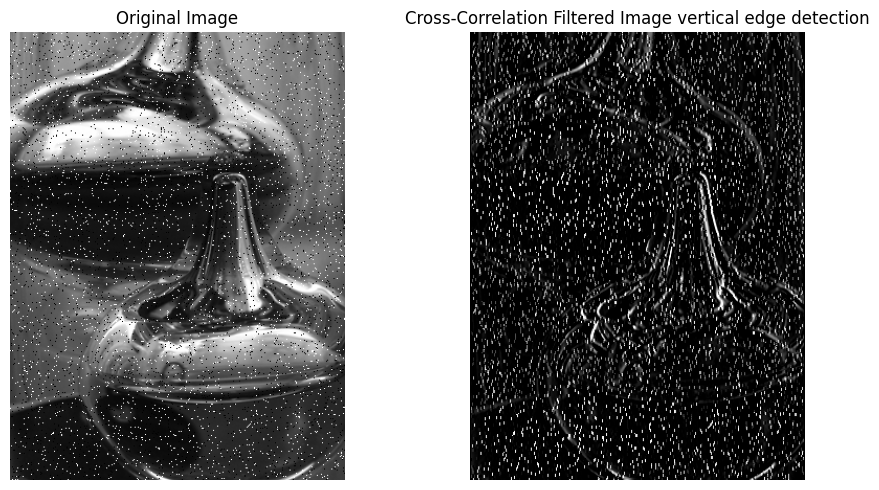

In [98]:
#Cross correlation
kernel = np.array([[1, 0, -1], 
                   [1, 0, -1],
                   [1, 0, -1]], dtype=np.float32)
cross_corr_filtered = apply_cross_correlation_filter(salt_pepper_image, kernel)
# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(salt_pepper_image, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(cross_corr_filtered, cmap='gray')
plt.title("Cross-Correlation Filtered Image vertical edge detection")
plt.axis("off")
plt.tight_layout()
plt.show()

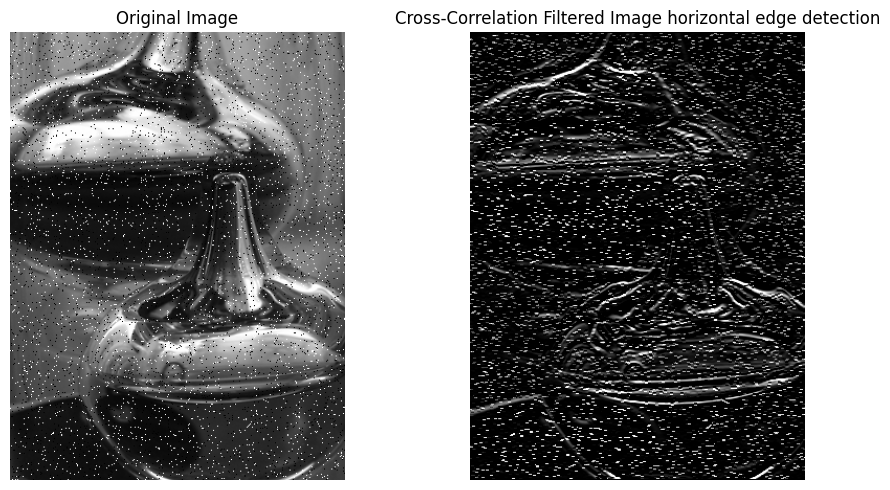

In [99]:
kernel = np.array([[1, 1, 1], 
                   [0, 0, 0],
                   [-1, -1, -1]], dtype=np.float32)
cross_corr_filtered = apply_cross_correlation_filter(salt_pepper_image, kernel)
# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(salt_pepper_image, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(cross_corr_filtered, cmap='gray')
plt.title("Cross-Correlation Filtered Image horizontal edge detection")
plt.axis("off")
plt.tight_layout()
plt.show()

Sobel Filters

In [100]:
#Sobel Filters
sobel_x = cv2.Sobel(dog, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in x direction
sobel_y = cv2.Sobel(dog, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in y direction

In [101]:
# Calculate the gradient magnitude
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

In [102]:
# Normalize Sobel outputs to 0-255 for display
sobel_x_display = cv2.normalize(np.abs(sobel_x), None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
sobel_y_display = cv2.normalize(np.abs(sobel_y), None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
gradient_magnitude_display = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

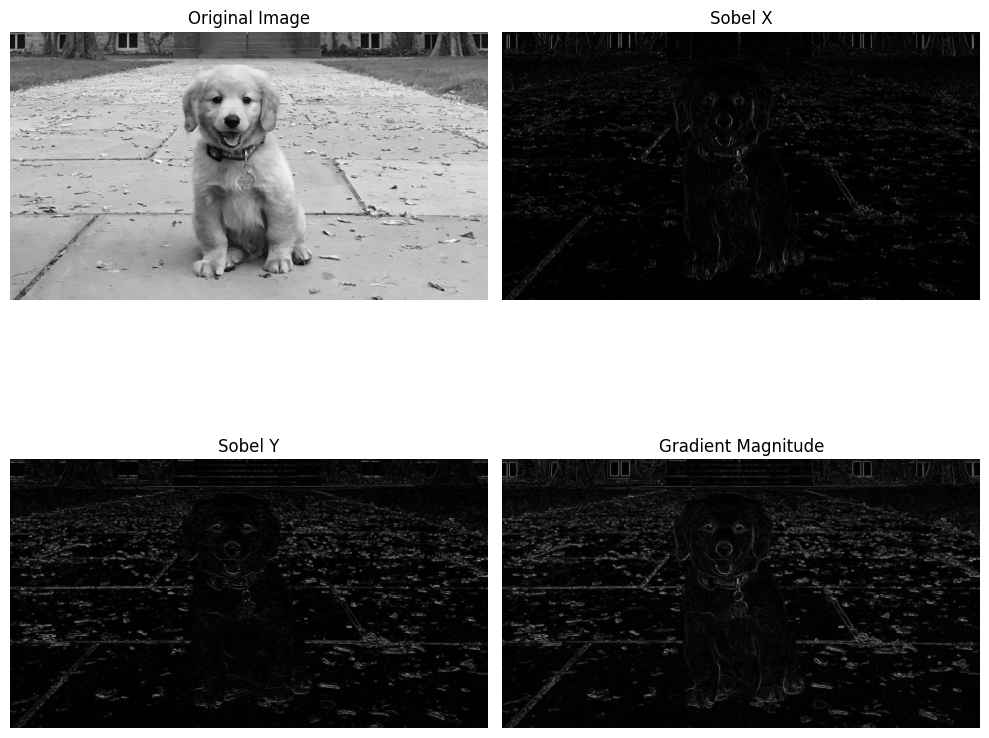

In [103]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(dog, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.title("Sobel X")
plt.imshow(sobel_x_display, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.title("Sobel Y")
plt.imshow(sobel_y_display, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.title("Gradient Magnitude")
plt.imshow(gradient_magnitude_display, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()

econd order gradient using laplacian operator

In [104]:
laplacian = cv2.Laplacian(dog, cv2.CV_64F, ksize=3)
# Normalize the Laplacian for better visualization
laplacian_normalized = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX)
# Convert to uint8 for display
laplacian_uint8 = laplacian_normalized.astype(np.uint8)

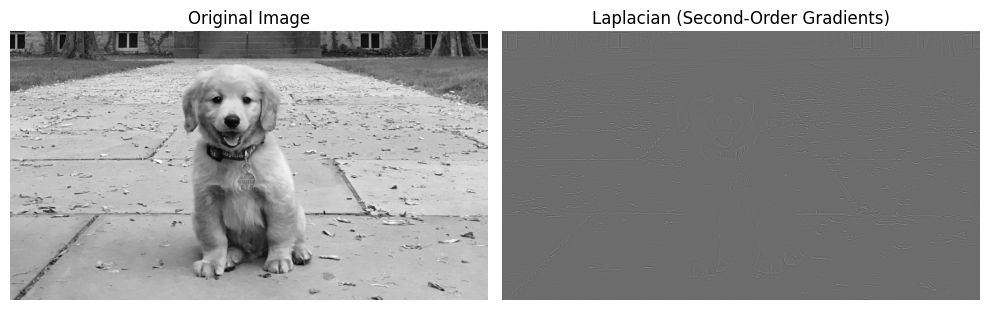

In [105]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(dog, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Laplacian (Second-Order Gradients)")
plt.imshow(laplacian_uint8, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()